In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join


In [2]:
import pandas as pd
import numpy as np

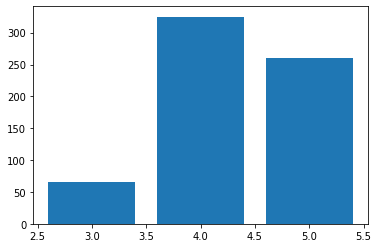

In [3]:
import matplotlib.pyplot as plt

dataset=pd.read_csv("iphonebatteryreviews2.csv")
summarised_results = dataset["stars"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [4]:
df = pd.read_csv('iphonebatteryreviews2.csv')
df.head(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
0,5,opinion dont think much phone attaching nightm...,40,31,0,1,6,77,414,5.3
1,5,opinion dont think much phone attaching nightm...,40,31,0,1,6,77,414,5.3
2,4,mom got phone using oneplus years change wante...,158,48,0,1,9,201,1384,6.0
3,4,almost months using iphone gb apple known one ...,282,92,0,9,33,382,2635,6.2
4,5,proscamera quality life issue face heating iss...,9,12,0,1,2,31,209,6.6


In [5]:
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
from textblob import TextBlob

df['comment']= df['comment'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['comment'].apply(pol)
df['subjectivity'] = df['comment'].apply(sub)
df

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,5,opinion dont think much phone attaching nightm...,40,31,0,1,6,77,414,5.3,0.475758,0.394697
1,5,opinion dont think much phone attaching nightm...,40,31,0,1,6,77,414,5.3,0.475758,0.394697
2,4,mom got phone using oneplus years change wante...,158,48,0,1,9,201,1384,6.0,0.414143,0.635169
3,4,almost months using iphone gb apple known one ...,282,92,0,9,33,382,2635,6.2,0.204994,0.510737
4,5,proscamera quality life issue face heating iss...,9,12,0,1,2,31,209,6.6,-0.243750,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...
645,4,rating right nowbut want make one thing clear ...,66,27,0,0,2,98,686,6.0,0.063452,0.574286
646,5,awesome phone specially youre upgrading older ...,17,9,0,0,0,28,200,6.2,0.515476,0.613095
647,4,battery lifecant complain much pretty decent w...,71,27,0,2,4,81,541,5.9,0.320952,0.499286
648,3,moved phone samsung transition ios easy howeve...,36,12,0,0,2,42,270,5.6,0.270655,0.597578


In [7]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
173,5,proscamera quality life issue face heating iss...,9,12,0,1,2,31,209,6.6,-0.24,0.45
138,3,moved phone samsung transition ios easy howeve...,36,12,0,0,2,42,270,5.6,0.27,0.60
356,5,awesome phone specially youre upgrading older ...,17,9,0,0,0,28,200,6.2,0.52,0.61
153,5,proscamera quality life issue face heating iss...,9,12,0,1,2,31,209,6.6,-0.24,0.45
478,3,moved phone samsung transition ios easy howeve...,36,12,0,0,2,42,270,5.6,0.27,0.60


In [8]:
df2= pd.DataFrame()

In [9]:
for i in range (1,5):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.stars == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.stars ==i].subjectivity.mean())

In [10]:
df2

,polarity,subjectivity
1,NaN,NaN
2,NaN,NaN
3,0.270,0.600
4,0.228,0.554


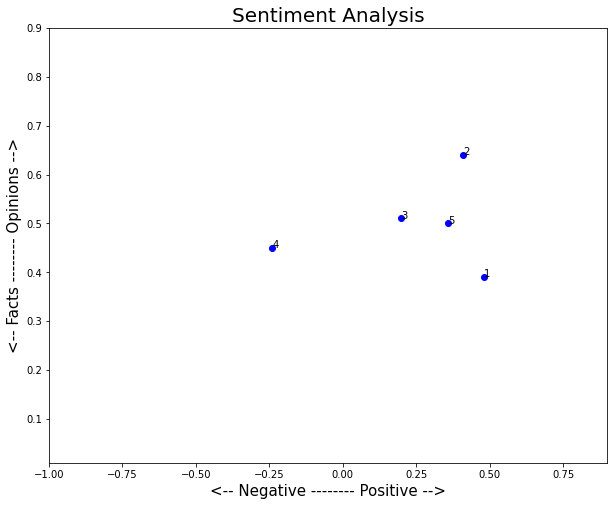

In [28]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df.polarity.loc[index]
    y = df.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.00001, y+.00001, index, fontsize=10)
    plt.xlim(-1.0, 0.9) 
    plt.ylim(0.01, 0.9) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [14]:
df2= df
df2['word_count']= df2['word_count'] //50*50

<AxesSubplot:xlabel='word_count'>

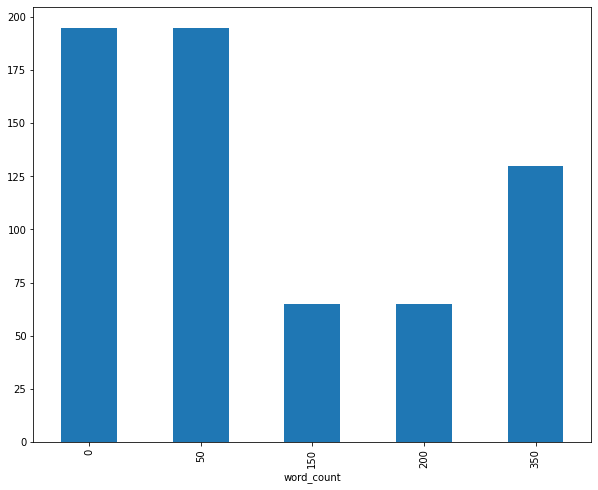

In [15]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

In [16]:
df_sub= df.loc[df.word_count //10*10]

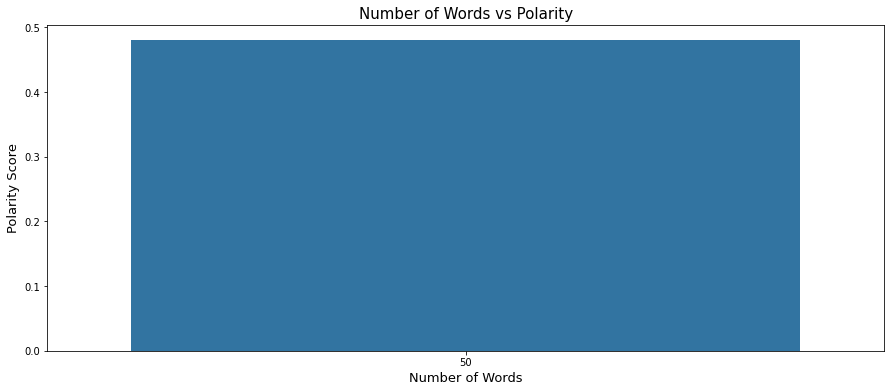

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(x='word_count', y='polarity', data=df_sub)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

/home/nalinjindal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

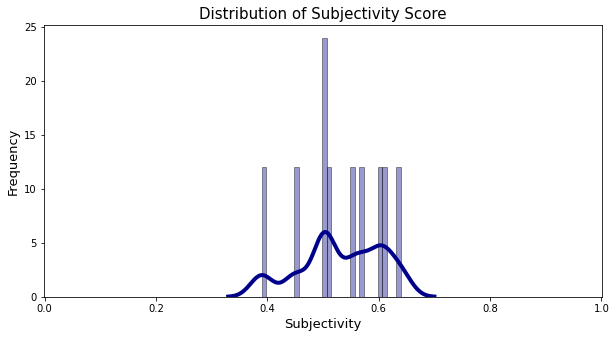

In [18]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)